# Pandas Basics

This week we will work with the `pandas` library for data analysis.
The reference guide for numpy can be found here: https://pandas.pydata.org/docs/. 

In [1]:
import numpy as np
import pandas as pd
import os


# Pandas Series

Let's start by creating a series of some data. As labels are not specified here, the indexes will be integers by default.

In [20]:
import pandas as pd

# pd.Series(
#    data=None,
#    index=None,
#    dtype: 'Dtype | None' = None,
#    name=None,
#    copy: 'bool' = False,
#    fastpath: 'bool' = False,
#)

labels = ['a', 'b', 'c']
data = [10,50,100]
arr = np.array(data)
d = {'a': 10, 'b': '50', 'c': 100}

pd.Series(data)


#To utilise like a dictionary / hash table:
#ser1["a"]



0     10
1     50
2    100
dtype: int64

# More on Series

Now let's add some labels

In [30]:
labels = ['a', 'b', 'c']
data = [10,50,100]
arr = np.array(data)
d = {'a': 10, 'b': '50', 'c': 100}

series1 = pd.Series(data, labels, None, "Test series")
series1


a     10
b     50
c    100
Name: Test series, dtype: int64

In [31]:
data = [1,2,3,4]
labels = ['USA', 'China', 'Sweden', 'UK']

series2 = pd.Series(data, labels)
series2

USA       1
China     2
Sweden    3
UK        4
dtype: int64

In [32]:
series3 = pd.Series([1,2,5,4],['USA','China','Italy','UK'])
series3

USA      1
China    2
Italy    5
UK       4
dtype: int64

# Concatenation of Series

Notice how the attempt to concatenate the values of the two previous series works for some values where there is alignment. But it doesn't work for all values where there is not alignment. Also notice how the data type changes to float.

In [34]:
series2 + series3

China     4.0
Italy     NaN
Sweden    NaN
UK        8.0
USA       2.0
dtype: float64

# DataFrames (+ Random number generation)

First let's generate some random numbers via the random module in numpy

Repeatedly run the cell below - what do you notice?

In [58]:
from random import randint
import numpy as np
import pandas as pd

from numpy.random import randn

np.random.seed(2000)

rnum = randint(1,100)
rarr = randn(5,4)

print(rnum)
print(rarr)

23
[[ 1.73673761  1.89791391 -2.10677342 -0.14891209]
 [ 0.58306155 -2.25923303  0.13723954 -0.70121322]
 [-0.62078008 -0.47961976  1.20973877 -1.07518386]
 [ 0.80691921 -0.29078347 -0.22094764 -0.16915604]
 [ 1.10083444  0.08251052 -0.00437558 -1.72255825]]


# Let's create a DataFrame

In [60]:
df = pd.DataFrame(randn(5,4), ['A','B','C','D','E'], ['W','X','Y','Z'])
df

,W,X,Y,Z
A,-0.668443,-1.033327,2.505239,0.106624
B,0.363085,1.112326,-0.591721,1.544800
C,2.476392,-2.874709,2.396024,0.131246
D,0.304399,1.176606,0.129894,0.213699
E,0.099963,-0.047857,0.374946,0.404629


# Select columns of the dataframe 

Like indexed structures we can get access to single columns, or multiple columns (if we pass in as an array).


In [61]:
df["W"]

A   -0.668443
B    0.363085
C    2.476392
D    0.304399
E    0.099963
Name: W, dtype: float64

In [62]:
df[["W", "Z"]]

,W,Z
A,-0.668443,0.106624
B,0.363085,1.544800
C,2.476392,0.131246
D,0.304399,0.213699
E,0.099963,0.404629


# Select rows

In [64]:
df.loc['A']

W   -0.668443
X   -1.033327
Y    2.505239
Z    0.106624
Name: A, dtype: float64

# Select rows - can also access via the integer position
In this case, 2 would be the 3rd row - AKA 'Row C'

In [66]:
#i for integer - can get to the index position. 
#2 in this case is row 3 AKA row C
df.iloc[2]

W    2.476392
X   -2.874709
Y    2.396024
Z    0.131246
Name: C, dtype: float64

# Smaller Sample Size

Pandas also has sample method, which returns a random and more manageable selection of rows to analyse.

In [69]:
df.sample(1)

,W,X,Y,Z
D,0.304399,1.176606,0.129894,0.213699


# Check for null values



In [22]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age Filled       0
dtype: int64

In [34]:
first_t = titanic_df[["Survived", "Pclass"]]
middle_t = titanic_df[["Parch","Cabin"]]
end_t = titanic_df[["Name", "Age"]]


In [35]:
end_t

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


# Joining columns in a custom dataframe

In [29]:
pd.concat([first_t, end_t], axis=0)

,Survived,Pclass,Name,Age
0,0.0,3.0,NaN,NaN
1,1.0,1.0,NaN,NaN
2,1.0,3.0,NaN,NaN
3,1.0,1.0,NaN,NaN
4,0.0,3.0,NaN,NaN
...,...,...,...,...
886,NaN,NaN,"Montvila, Rev. Juozas",27.0
887,NaN,NaN,"Graham, Miss. Margaret Edith",19.0
888,NaN,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,NaN,NaN,"Behr, Mr. Karl Howell",26.0


# Exploratory Data Analysis


<AxesSubplot:ylabel='Frequency'>

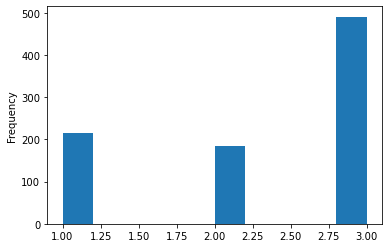

In [43]:
titanic_df["Pclass"].plot(kind = 'hist')

# Plotting the count of each gender which survived

<AxesSubplot:xlabel='Sex'>

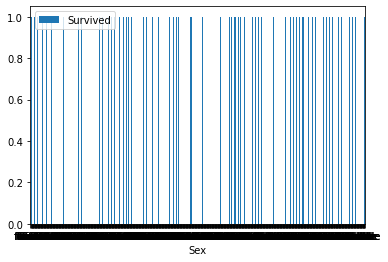

In [85]:
df = titanic_df[["Survived", "Sex"]]
#df

#malec = 0
#femalec = 0
#for i in df:
#    print(df['Sex'])

#    if(survived == 1 and sex == "male"):
#        malec +=1
#    if(survived == 1 and sex == "female"):
#        femalec +=1
        
#print(femalec)

titanic_df.plot.bar(x = 'Sex', y = 'Survived', rot=0)